# ENCO

## Packages

### Libraries

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import time
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta

# For creating cool charts :)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
from matplotlib import image
import matplotlib as mpl
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.dates as mdates
from highlight_text import ax_text


# We load pre-defined functions, fonts and stylesheet.
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utils")
    sys.path.append(module_path+"\\assets")

from tukan_helper_functions import *

path = [x for x in sys.path if "utils" in x][0]

# Optional for TUKAN's mplstylesheet
plt.style.use(module_path + '\\utils\\tukan_style.mpl')

In [2]:
# Spanish
import locale
locale.setlocale(locale.LC_ALL, 'es_es')

'es_es'

### Customized functions

In [3]:
# Filter dataframe by date range or for two specific dates
def date_selection(data_frame,first_date,last_date,inbewtween):
    if inbewtween==True:
        data_frame = data_frame[(data_frame["date"] >= first_date) & (data_frame["date"] <= last_date)].reset_index(drop = True)
    else:
        data_frame = data_frame[(data_frame["date"] == first_date) | (data_frame["date"] == last_date)].reset_index(drop = True)
    return(data_frame)

# Return last date for any dataframe with a 'date' columns
def last_date(dataframe):
    x= dataframe['date'].tail(1).dt.strftime('%Y-%m-%d').to_string()[-10:]
    return(x)

### Fonts

In [4]:
#n Load new fonts
# Load the Comfortaa style

path = [x for x in sys.path if "assets" in x][0] + "\\fonts\\Teko\\"

for x in os.listdir(path):
    if x.split(".")[-1] == "ttf":
        fm.fontManager.addfont(path + "/" + x)
        try:
            fm.FontProperties(weight=x.split(
                "-")[-1].split(".")[0].lower(), fname=x)
        except:
            x

path = [x for x in sys.path if "assets" in x][0] + "\\fonts\\Dosis\\"

for x in os.listdir(path):
    if x.split(".")[-1] == "ttf":
        fm.fontManager.addfont(path + "/" + x)
        try:
            fm.FontProperties(weight=x.split(
                "-")[-1].split(".")[0].lower(), fname=x)
        except:
            x

## Data

### Payload

In [5]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        ""
    ],
    "categories": {},
    "request": [
        {
            "table": "mex_inegi_enco_index",
            "variables": [
                "f789b42197d3c85"
            ]
        }
    ],
    "from": "2000-01-07"
}
response = get_tukan_api_request(payload)
data = response["data"]

Success getting the data


In [6]:
final_data = data.copy()
final_data["president"] = ["Zedillo" if x < datetime(2000,12,1) else "Fox" if x < datetime(2006,12,1) else "Calderón" if x < datetime(2012,12,1) else "Peña Nieto" if x < datetime(2018,12,1) else "AMLO" for x in final_data["date"]]
final_data
# data

,date,f789b42197d3c85,president
0,2001-04-01,46.629247,Fox
1,2001-05-01,45.186165,Fox
2,2001-06-01,44.568246,Fox
3,2001-07-01,46.874405,Fox
4,2001-08-01,47.693093,Fox
...,...,...,...
247,2021-11-01,45.935432,AMLO
248,2021-12-01,44.896417,AMLO
249,2022-01-01,43.590904,AMLO
250,2022-02-01,42.940054,AMLO


In [13]:
final_data['mom_var'] = (final_data['f789b42197d3c85']-final_data['f789b42197d3c85'].shift())
final_data['yoy_var'] = (final_data['f789b42197d3c85']-final_data['f789b42197d3c85'].shift(12))
last_value = final_data['f789b42197d3c85'].iloc[-1] 
yoy_var =final_data['yoy_var'].iloc[-1]
mom_var = final_data['mom_var'].iloc[-1]
last_date = final_data['date'].iloc[-1]
print(f"The ICC on {last_date.strftime('%b-%Y')} came in {last_value:.2f}.  The yoy change was {yoy_var:.2f}, while the mom change was {mom_var:.2f}")
# final_data[(final_data['f789b42197d3c85']>=96) & (final_data['f789b42197d3c85']<=98)]
# final_data[(final_data['yoy_var']>=0.08) & (final_data['yoy_var']<=0.09)]

The ICC on mar.-2022 came in 43.56.  The yoy change was 2.98, while the mom change was 0.62


In [14]:
final_data.tail(20)


,date,f789b42197d3c85,president,mom_var,yoy_var
232,2020-08-01,35.064783,AMLO,0.647439,-8.754429
233,2020-09-01,36.282044,AMLO,1.217261,-9.017429
234,2020-10-01,37.891240,AMLO,1.609196,-6.168496
235,2020-11-01,37.076741,AMLO,-0.814499,-6.763986
236,2020-12-01,38.748705,AMLO,1.671964,-5.008645
237,2021-01-01,39.211395,AMLO,0.462690,-4.909059
238,2021-02-01,38.640137,AMLO,-0.571258,-4.689806
239,2021-03-01,40.581572,AMLO,1.941435,-1.477709
240,2021-04-01,42.509073,AMLO,1.927501,10.285527
241,2021-05-01,42.422701,AMLO,-0.086372,11.354457


En marzo del 2022 el ICC registró un nivel de 43.6 puntos, equivalente a un aumento de 0.7 puntos respecto al mes anterior.


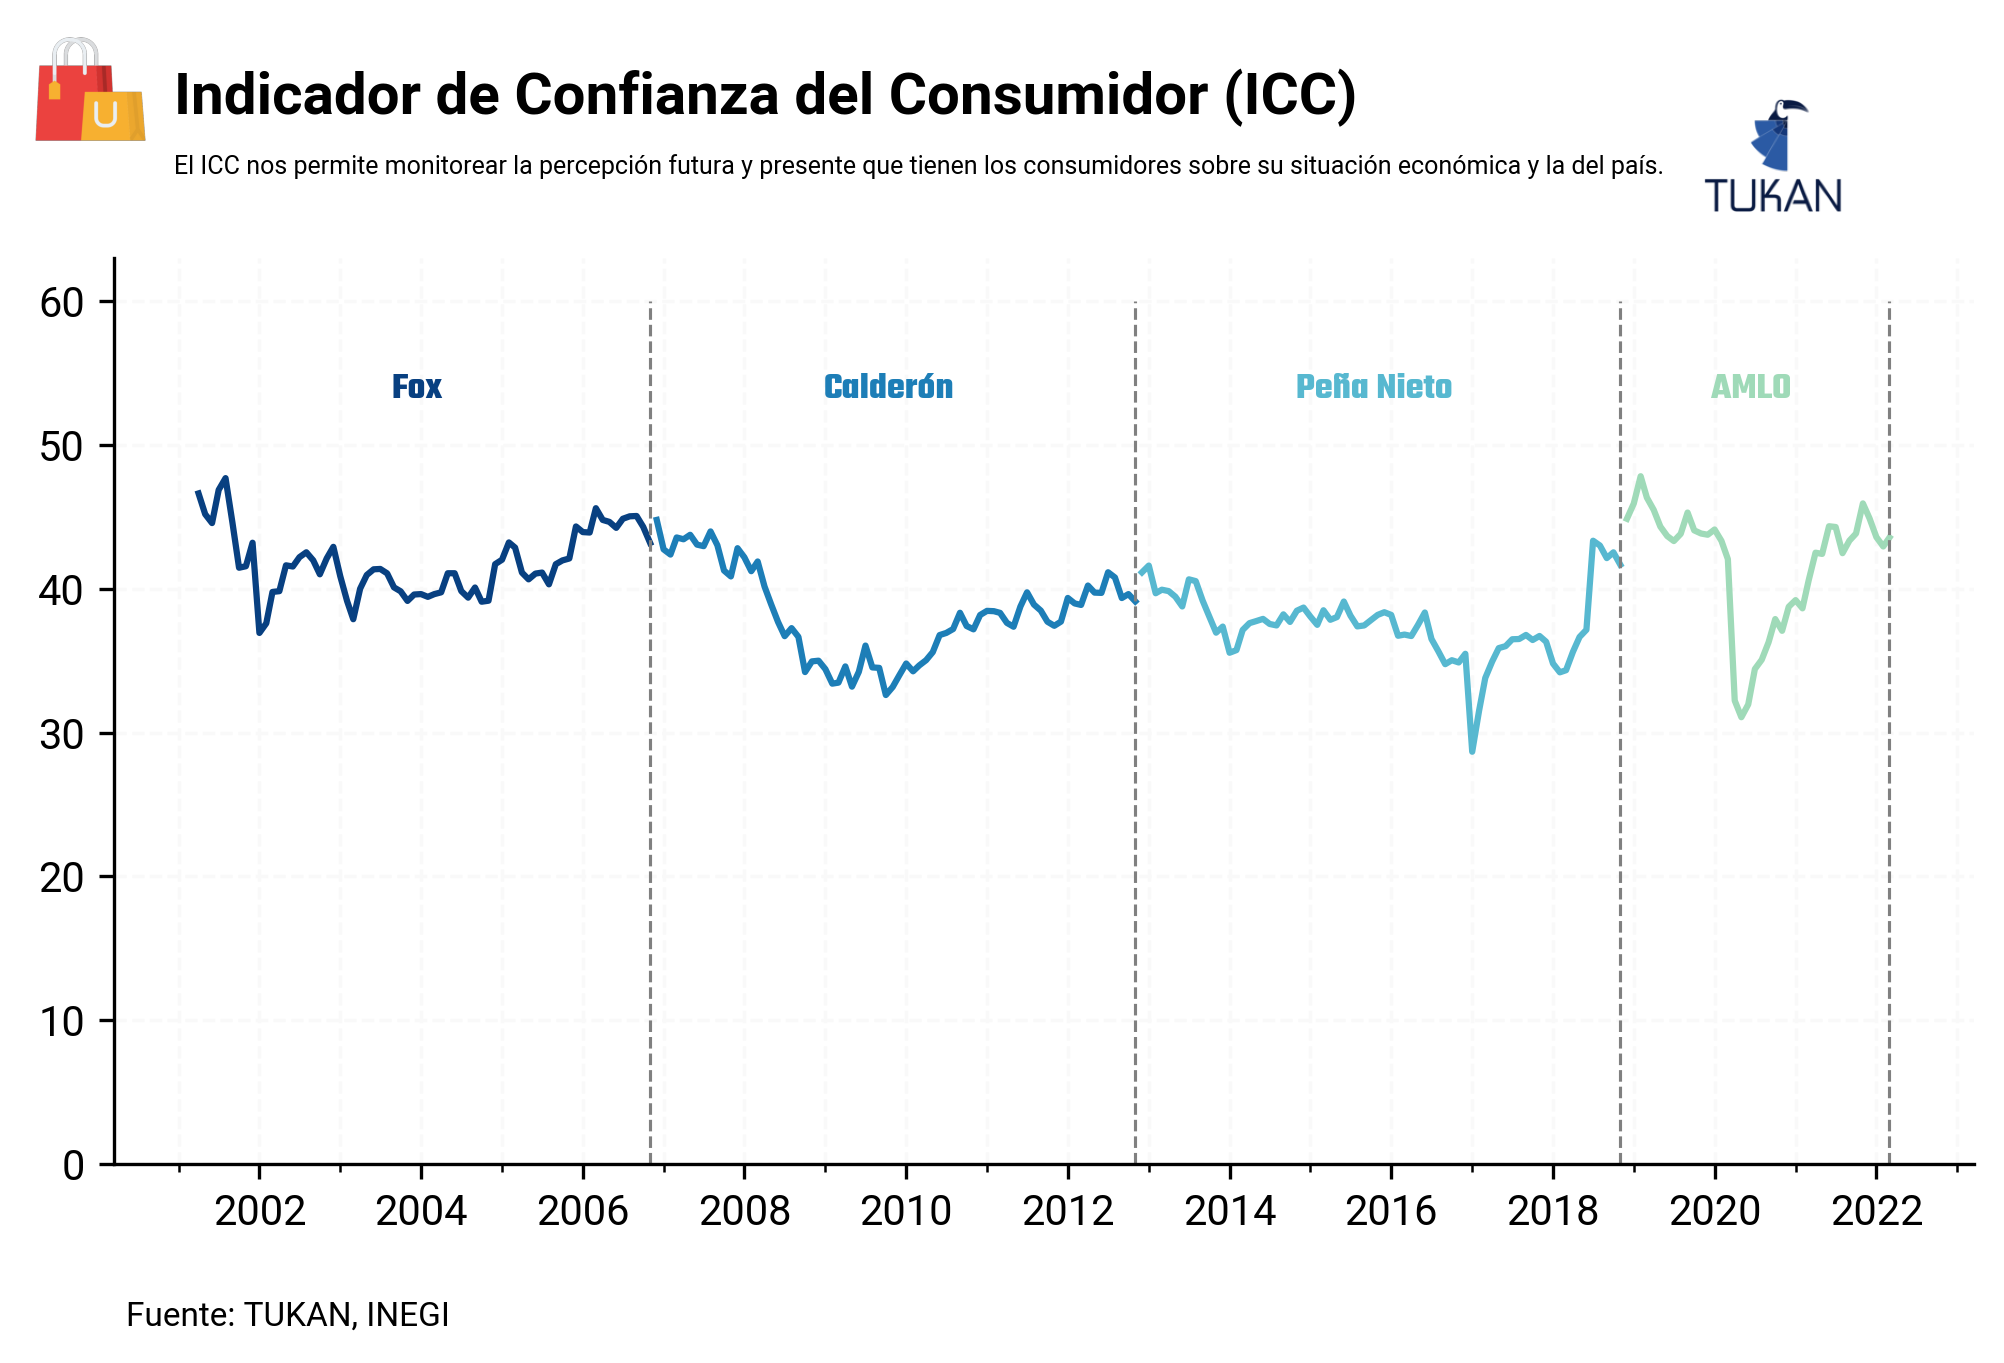

In [10]:
fig = plt.figure(dpi=300, figsize=(8,4))
ax = plt.subplot(111)

presidents = list(final_data["president"].unique())

cmap = mpl.cm.get_cmap("GnBu_r", len(presidents) + 2)

for index, x in enumerate(presidents):
    ax.plot(final_data[final_data["president"] == x]["date"], final_data[final_data["president"] == x]["f789b42197d3c85"], color = cmap(index))

    X_max = final_data[final_data["president"] == x]["date"].max()
    X_min = final_data[final_data["president"] == x]["date"].min()
    center_date = X_min + ((X_max - relativedelta(months=2)) - X_min)/2

    ax.vlines(X_max, ymin = 0, ymax = 60, color = "gray", ls = "--", lw = .75)
    ax_text(x = center_date, y = 55,
            s = f"<{x}>",
            highlight_textprops=[{"color": cmap(index)}], 
                                ax = ax, weight = "bold", font = "Teko", ha = "center", size = 9)


# ax.set_gid(color = "#dddddd")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# Add minor gridlines and format ticks
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

ax.grid(visible=True, which='both', linestyle='--', color = "#f9f9f9")

ax.set_ylim(0)

# Icon
icon_icon = image.imread("shopping.png")
icon_ax = fig.add_axes([0.09, .97, 0.05, 0.1], zorder=1)
icon_ax.imshow(icon_icon)
icon_ax.axis("off")

# Title and subtitle
last_month = final_data['date'].tail(1).dt.strftime("%B del %Y").values[0]
last_value = final_data['f789b42197d3c85'].tail(1).values[0].round(1)
second_to_last_value = final_data['f789b42197d3c85'].tail(2).values[0].round(1) 
change_value = last_value - second_to_last_value

if change_value > 0:
    var_value = 'un aumento'
else:
    var_value = 'una disminución'

fig.text(
    0.15,
    1,
    "Indicador de Confianza del Consumidor (ICC)",
    size=14,
    weight = "bold",
    font = "Roboto"
)
fig.text(
    0.15,
    0.95,
    f"El ICC nos permite monitorear la percepción futura y presente que tienen los consumidores sobre su situación económica y la del país. ",
    size=6
)
# Add footer
fig.text(0.13, -0.01, "Fuente: TUKAN, INEGI", fontsize=8)

# Save plot with TUKAN logo, transparent and white
# plt.savefig(
#     "plots/icc_no_logo.svg",
#     dpi=300,
#     bbox_inches="tight",
#     # facecolor="white",
#     edgecolor="none",
#     transparent=True,
# )

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.72, .88, 0.14, 0.17], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

plt.savefig(
    "plots/icc_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

plt.savefig(
    "plots/icc_white_logo.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)

print(f"En {last_month} el ICC registró un nivel de {last_value} puntos, equivalente a {var_value} de {abs(change_value.round(1))} puntos respecto al mes anterior.")